# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
#     df.to_csv('pca-dataset.csv', index=False)
    return df
    
df = generate_data()

In [53]:
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [55]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

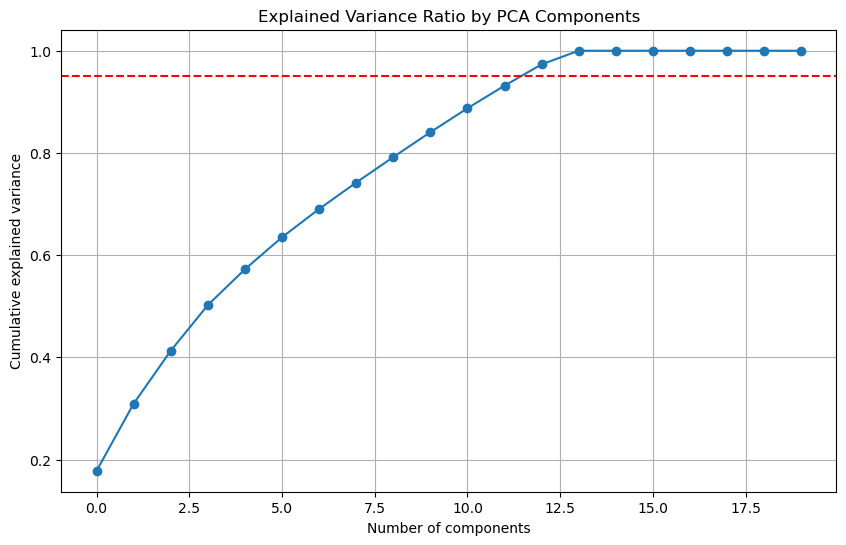

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# performing PCA
pca = PCA()
pca.fit(X_train_scaled)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# plotting explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

Since there are 12 components below the 95% line, so I recommend using 12 principal components to explain 95% of the variance in the data.

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

Class Distribution in the Dataset (%):
target
0.0    744
2.0    380
1.0    376
Name: count, dtype: int64


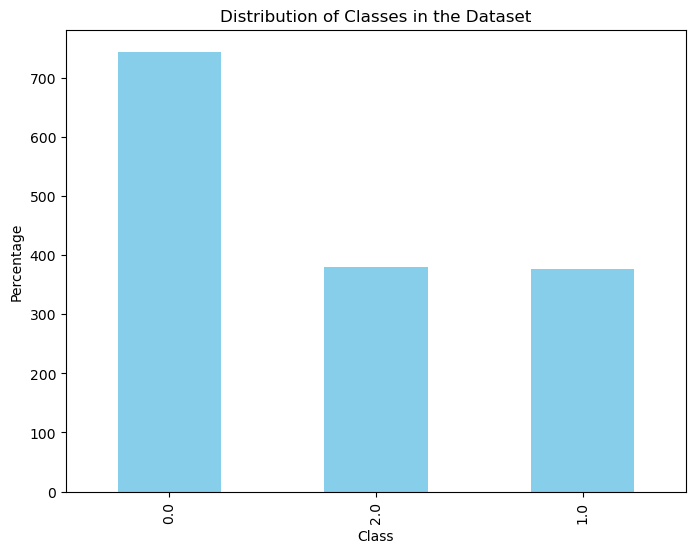

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# calculating class distribution
class_distribution = df['target'].value_counts()

# printing class distribution
print("Class Distribution in the Dataset (%):")
print(class_distribution)

# plotting the distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Distribution of Classes in the Dataset')
plt.show()

>

Because this is a classification problem, so we will use logistic regression and since there is a class imbalance in the dataset so we cannot use accuracy, but will use precision as our metric for evaluating the model.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=123))
])

# training the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# calculating metrics for test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

Accuracy: 0.7033333333333334
Precision: 0.7040254342431762
Recall: 0.7033333333333334
              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



> 

The precision comes to 0.7 without using pca

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# logistic regression using PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)), 
    ('classifier', LogisticRegression(random_state=123))
])

# training the model
pipeline_pca.fit(X_train, y_train)
y_pred_pca = pipeline_pca.predict(X_test)

# calculating metrics for test data
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

print("Accuracy with PCA:", accuracy_pca)
print("Precision with PCA:", precision_pca)
print("Recall with PCA:", recall_pca)
print(classification_report(y_test, y_pred_pca))

Accuracy with PCA: 0.7
Precision with PCA: 0.6980734649122807
Recall with PCA: 0.7
              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       153
         1.0       0.66      0.57      0.61        74
         2.0       0.64      0.67      0.66        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.68       300
weighted avg       0.70      0.70      0.70       300



>

The precision after using pca comes to 0.69 which decreased than the original model, so we can conclude that the model was doing better without using pca

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# decision tree model
decision_tree = DecisionTreeClassifier(random_state=123)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

# calculating metrics for test data
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

print("Accuracy of Decision Tree:", accuracy_dt)
print("Precision of Decision Tree:", precision_dt)
print("Recall of Decision Tree:", recall_dt)

Accuracy of Decision Tree: 0.66
Precision of Decision Tree: 0.6798572683355292
Recall of Decision Tree: 0.66


> 

Precision of decision tree without using pca is 67.9% which is somewhat lesser than logistic regression model which was 70% as they perform better on linearly separable data.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# decision tree using PCA
pipeline_pca_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=12)),
    ('classifier', DecisionTreeClassifier(random_state=123))
])

# training the model with PCA
pipeline_pca_dt.fit(X_train, y_train)
y_pred_pca_dt = pipeline_pca_dt.predict(X_test)

# calculating metrics for test data
accuracy_pca_dt = accuracy_score(y_test, y_pred_pca_dt)
precision_pca_dt = precision_score(y_test, y_pred_pca_dt, average='weighted')
recall_pca_dt = recall_score(y_test, y_pred_pca_dt, average='weighted')

print("Accuracy with PCA Decision Tree:", accuracy_pca_dt)
print("Precision with PCA Decision Tree:", precision_pca_dt)
print("Recall with PCA Decision Tree:", recall_pca_dt)

Accuracy with PCA Decision Tree: 0.6433333333333333
Precision with PCA Decision Tree: 0.6516749011857708
Recall with PCA Decision Tree: 0.6433333333333333


>

Precision of decision tree using PCA is 65.1% which is lesser then our original model, so we can conclude that adding PCA doesn't work in this case.

the orignial logistic regression model has the best precision.